In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris-flower-dataset/IRIS.csv


In [2]:
data = pd.read_csv('/kaggle/input/iris-flower-dataset/IRIS.csv')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
data.describe(include='all')

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [5]:
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
data['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [7]:
le = LabelEncoder()
data['species']=le.fit_transform(data['species'])
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
data.corr()

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,-0.109369,0.871754,0.817954,0.782561
sepal_width,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
petal_length,0.871754,-0.420516,1.000000,0.962757,0.949043
petal_width,0.817954,-0.356544,0.962757,1.000000,0.956464
species,0.782561,-0.419446,0.949043,0.956464,1.000000


<AxesSubplot:>

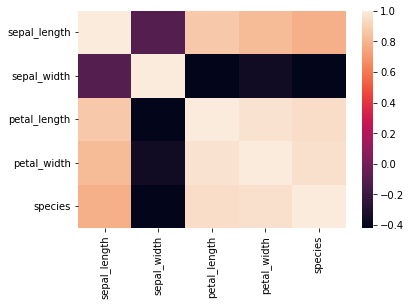

In [9]:
sns.heatmap(data.corr())

<AxesSubplot:xlabel='sepal_length', ylabel='species'>

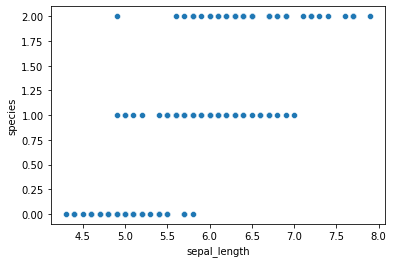

In [10]:
sns.scatterplot(x='sepal_length',y='species', data=data)

<AxesSubplot:xlabel='sepal_width', ylabel='species'>

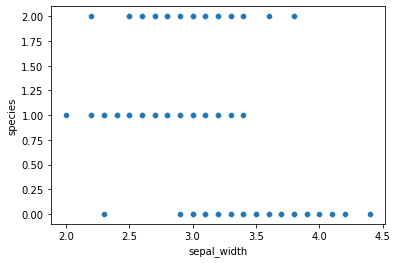

In [11]:
sns.scatterplot(x='sepal_width',y='species', data=data)

<AxesSubplot:xlabel='petal_length', ylabel='species'>

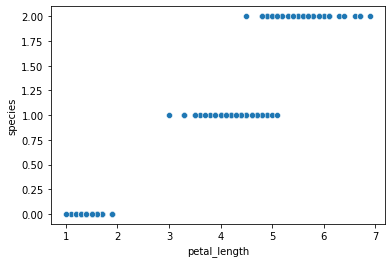

In [12]:
sns.scatterplot(x='petal_length',y='species', data=data)

<AxesSubplot:xlabel='petal_width', ylabel='species'>

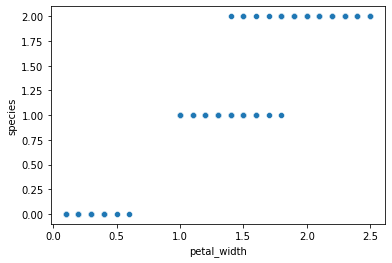

In [13]:
sns.scatterplot(x='petal_width',y='species', data=data)

<AxesSubplot:xlabel='species', ylabel='count'>

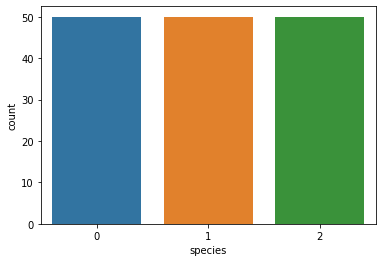

In [14]:
sns.countplot(x='species',data=data)

array([[<AxesSubplot:title={'center':'sepal_length'}>,
        <AxesSubplot:title={'center':'sepal_width'}>],
       [<AxesSubplot:title={'center':'petal_length'}>,
        <AxesSubplot:title={'center':'petal_width'}>],
       [<AxesSubplot:title={'center':'species'}>, <AxesSubplot:>]],
      dtype=object)

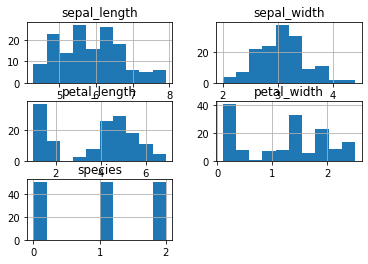

In [15]:
data.hist()

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [17]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]
print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,shuffle=True)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(120, 4)
(120,)
(30, 4)
(30,)


In [19]:
LogisticRegressionModel = LogisticRegression(penalty='l2',solver='sag',C=1.0,random_state=33)
LogisticRegressionModel.fit(X_train, y_train)


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


LogisticRegression(random_state=33, solver='sag')

In [20]:
#Calculating Details
print('LogisticRegressionModel Train Score is : ' , LogisticRegressionModel.score(X_train, y_train))
print('LogisticRegressionModel Test Score is : ' , LogisticRegressionModel.score(X_test, y_test))
print('LogisticRegressionModel Classes are : ' , LogisticRegressionModel.classes_)
print('LogisticRegressionModel No. of iteratios is : ' , LogisticRegressionModel.n_iter_)
print('----------------------------------------------------')

LogisticRegressionModel Train Score is :  0.975
LogisticRegressionModel Test Score is :  1.0
LogisticRegressionModel Classes are :  [0 1 2]
LogisticRegressionModel No. of iteratios is :  [100]
----------------------------------------------------


In [21]:
#Calculating Prediction
y_pred = LogisticRegressionModel.predict(X_test)
y_pred_prob = LogisticRegressionModel.predict_proba(X_test)
print('Predicted Value for LogisticRegressionModel is : ' , y_pred[:10])
print('Prediction Probabilities Value for LogisticRegressionModel is : ' , y_pred_prob[:10])

Predicted Value for LogisticRegressionModel is :  [0 0 1 1 2 2 2 0 1 0]
Prediction Probabilities Value for LogisticRegressionModel is :  [[9.83780931e-01 1.62189654e-02 1.03897586e-07]
 [9.46016968e-01 5.39816810e-02 1.35098538e-06]
 [2.45843083e-02 9.02370741e-01 7.30449507e-02]
 [2.37531644e-02 9.05234563e-01 7.10122723e-02]
 [1.00949846e-03 2.39693821e-01 7.59296681e-01]
 [3.91835058e-03 4.14050924e-01 5.82030726e-01]
 [5.71682044e-06 4.35655300e-02 9.56428753e-01]
 [9.94885943e-01 5.11404599e-03 1.05984783e-08]
 [2.90557768e-02 7.88436100e-01 1.82508124e-01]
 [9.81379683e-01 1.86201197e-02 1.97078018e-07]]


In [22]:
y_test[0:10]

36     0
12     0
75     1
60     1
147    2
138    2
122    2
14     0
59     1
48     0
Name: species, dtype: int64

In [23]:
from sklearn import metrics
k_range = range(1,26)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors= k)
    knn.fit(X_train , y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test , y_pred) )
print(scores)

[1.0, 0.9666666666666667, 1.0, 1.0, 1.0, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9, 0.9, 0.9666666666666667, 0.9, 0.9333333333333333, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9]


Text(0, 0.5, 'testing accuracy')

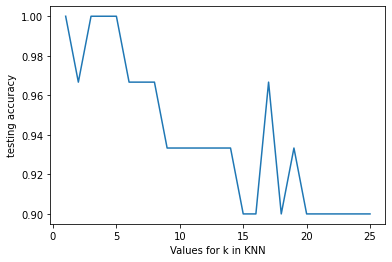

In [24]:
plt.plot(k_range , scores)
plt.xlabel('Values for k in KNN')
plt.ylabel('testing accuracy')